# Diffusion model

they are deterministic, dynamical network models are not fundamentally different from other conventional dynamical system.

Diffusion on a network can be a generalization of spatial diffusion models into non-regular, non-homogeneous spatial topologies.

The basic assumption is that the flow of the stuff is determined by the difference in its concentration across the edge:

$$\frac{dc_i}{dt} = \alpha\sum_{j\in N_i}(c_j - c_i)$$

- $c_i$ is the concentration of the stuff on node $i$
- $\alpha$ is the diffusion constant
-  $(c_j − c_i)$ represents the difference in the concentration between node $j$ and node $i$ across the edge $(i, j)$

The entire list of node states by a state vector $$c = [c_1\ c_2\ \cdots\ c_n]^\top$$. The above equation can be written as

$$\frac{dc}{dt} = -\alpha Lc$$

where $L$ is what is called a **Laplacian matrix** of the network, which is defined as $$L = D - A$$

where $A$ is the adjacency matrix of the network, and $D$ is the degree matrix of the network.

The Laplacian matrix of a graph is a discrete equivalent of the Laplacian operator for continuous space.

$$\nabla^2 \equiv -L$$

In [1]:
import numpy as np

In [2]:
A = np.array([[0, 1, 1, 0],
              [1, 0, 1, 0],
              [1, 1, 0, 1],
              [0, 0, 1, 0]])

D = np.diag(A.sum(axis=1))

L = D - A

In [3]:
A

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]])

In [4]:
D

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [5]:
L

array([[ 2, -1, -1,  0],
       [-1,  2, -1,  0],
       [-1, -1,  3, -1],
       [ 0,  0, -1,  1]])

Now that we have the mathematical equations for diffusion on a network, we can discretize time to simulate their dynamics in Python.

$$
\begin{align}
c_i(t+\Delta t) &= c_i(t) + \left[\alpha\sum_{j\in N_j}(c_j(t) - c_i(t))\right]\Delta t\\
&= c_i(t) + \alpha\left[\left(\sum_{j\in N_j}c_j(t)\right) - c_i(t)\deg(i)\right]\Delta t
\end{align}
$$

Equivalently
$$
\begin{align}
c_i(t+\Delta t) &= c(t) - \alpha Lc(t)\Delta t\\
&= (I - \alpha L\Delta t)c(t)
\end{align}
$$


In [6]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [7]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

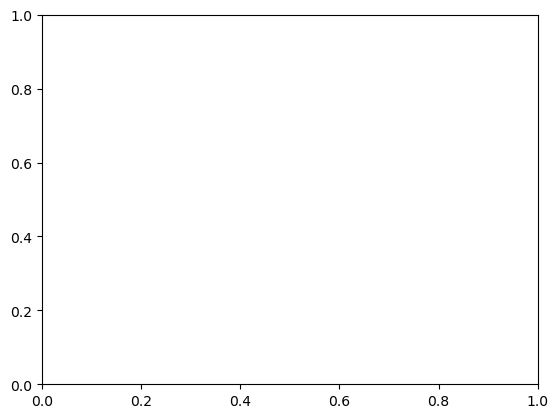

In [8]:
alpha = 1 # diffusion constant
Dt = 0.01 # Delta t

# initialize a graph
g = nx.karate_club_graph()
pos = nx.circular_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]
    
nextg = g.copy()

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(8, 8))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    
    for i in g.nodes():
        ci = g.nodes[i]['state']
        

        nextg.nodes[i]['state'] = ci + alpha * (sum(g.nodes[j]['state'] for j in g.neighbors(i)) - ci * g.degree(i)) * Dt
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.binary, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos,
            ax=ax)
    plt.close()
    g, nextg = nextg, g

In [9]:
anim = animation.FuncAnimation(fig, animate, frames=200, interval=100)

In [10]:
anim

# Coupled oscillator model

Its mathematical formulation is quite straightforward; you just need to add a local reaction term to the above equation, to obtain

$$\frac{dc_i}{dt} = R_i(c_i) + \alpha\sum_{j\in N_i}(c_j - c_i)$$

To represent this type of phase-based interaction among coupled oscillators, a Japanese physicist Yoshiki Kuramoto proposed the following very simple, elegant mathematical model in the 1970s [70]:

$$\frac{d\theta_i}{dt} = \omega_i + \alpha\frac{\sum_{j\in N_i}\sin(\theta_j - \theta_i)}{|N_i|}$$


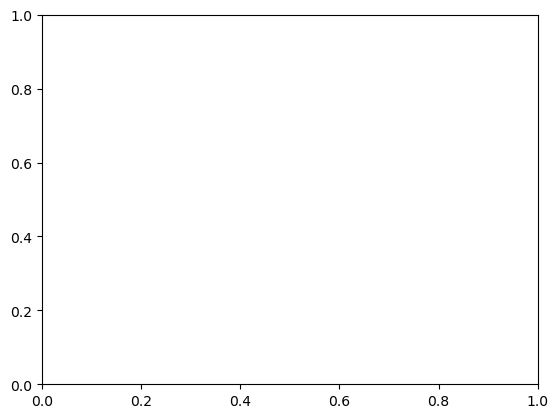

In [11]:
alpha = 1 # diffusion constant
Dt = 0.01 # Delta t

# initialize a graph
g = nx.karate_club_graph()
pos = nx.circular_layout(g)

for i in g.nodes():
    g.nodes[i]['theta'] = 2 * np.pi * random.random()
    g.nodes[i]['omega'] = 1. + random.uniform(-0.05, 0.05)
nextg = g.copy()

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(8, 8))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    for i in g.nodes():
        theta_i = g.nodes[i]['theta']
        omega_i = g.nodes[i]['omega']
        
        R_i = omega_i + alpha * sum(np.sin(g.nodes[j]['theta'] - theta_i) for j in g.neighbors(i)) / g.degree(i)
        nextg.nodes[i]['theta'] = theta_i + R_i * Dt
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.hsv, vmin=-1, vmax=1,
            node_color=[np.sin(g.nodes[n]['theta']) for n in g.nodes()],
            pos=pos,
            ax=ax)
    plt.close()
    g, nextg = nextg, g

In [12]:
anim = animation.FuncAnimation(fig, animate, frames=400, interval=100)

In [13]:
anim